# BI Analysis Demand Forecasting

Shawna Tuli (shawna.tuli@avanade.com)

Import libraries

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

Read data

In [28]:
df = pd.read_csv('dataset_2.csv', low_memory = False)
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


Remove the '%' sign and convert to float

In [29]:
df['Accept Rate'] = df['Accept Rate'].str.replace('%', '').astype(float) / 100

Feature engineering (example: create a new feature 'Trips per Hour')

In [30]:
df['Trips per Hour'] = df['Trips Completed'] / df['Supply Hours']

Select features and target variable

In [31]:
X = df[['Accept Rate', 'Supply Hours', 'Trips per Hour', 'Rating']]
y = df['Trips Completed']

Split data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and train the model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [34]:
y_pred = model.predict(X_test)

Evaluate the model

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.625442863794397
R-squared: 0.8770589686887742


Visualize the results (optional)

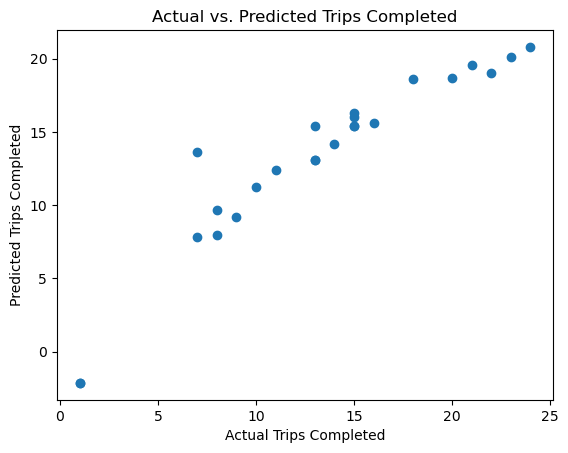

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed')
plt.show()

Further analysis and improvements:
1. Data preprocessing: Handle missing values, outliers, and scale features.
2. Feature engineering: Explore more relevant features (e.g., time-based features, location data).
3. Model selection: Experiment with different models (e.g., decision trees, random forests, time series models).
4. Hyperparameter tuning: Optimize model parameters for better performance.
5. Time series analysis: If your data has a time component, consider time series forecasting methods.

Feature Engineering (Example: Lagged Features)

In [44]:
df['Lag_1'] = df['Trips Completed'].shift(1)  # Lag 1 
df['Lag_7'] = df['Trips Completed'].shift(7)  # Lag 7 (Weekly)
df['Lag_30'] = df['Trips Completed'].shift(30)  # Lag 30 (Monthly)
df.dropna(inplace=True) 

Split data

In [45]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

Prepare data for machine learning models

In [46]:
X_train = train[['Lag_1', 'Lag_7', 'Lag_30']]
y_train = train['Trips Completed']
X_test = test[['Lag_1', 'Lag_7', 'Lag_30']]
y_test = test['Trips Completed']

1. Decision Tree Regression

In [47]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")

Decision Tree - MSE: 17.833333333333332, R-squared: 0.3879885605338418


2. Random Forest Regression

In [48]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

Random Forest - MSE: 21.13013333333333, R-squared: 0.2748476644423262


3. ARIMA Model (Time Series)

In [53]:
# Find optimal ARIMA order (p, d, q) - This part requires careful tuning
p, d, q = 1, 1, 0  # Example order
arima_model = ARIMA(train['Trips Completed'], order=(p, d, q))
arima_results = arima_model.fit()
arima_pred = arima_results.forecast(steps=len(test))
arima_mse = mean_squared_error(y_test, arima_pred)
arima_r2 = r2_score(y_test, arima_pred)
print(f"ARIMA ({p},{d},{q}) - MSE: {arima_mse}, R-squared: {arima_r2}")

ARIMA (1,1,0) - MSE: 28.987508700350123, R-squared: 0.0051951256314543


Plot results (Example for Decision Tree)

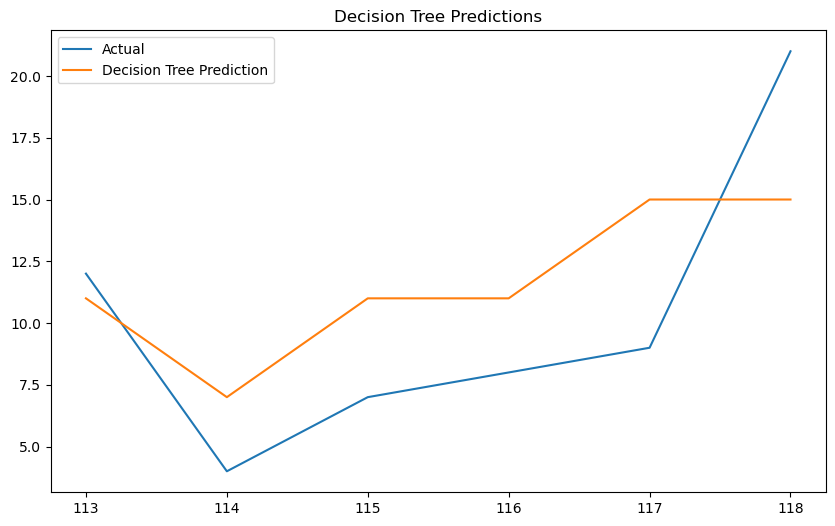

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, dt_pred, label='Decision Tree Prediction')
plt.legend()
plt.title('Decision Tree Predictions')
plt.show()

Note:
1. Replace placeholders with your actual data.
2. Experiment with different lag values and feature engineering.
3. Tune hyperparameters for Decision Tree and Random Forest (max_depth, min_samples_leaf, etc.).
4. Perform rigorous hyperparameter tuning for the ARIMA model using techniques like grid search.
5. Consider incorporating external factors (e.g., weather, events, holidays) if available.
6. Evaluate model performance using appropriate metrics (e.g., MAPE, RMSE) and choose the best model based on your specific needs.

End